<a href="https://colab.research.google.com/github/Khushisingh0103/portfolio/blob/main/NVDA_STOCKMARKETANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***NVIDIA(NVDA) STOCK MARKET ANALYSIS***

*22-July-2024 to 22-July-2025*

In [ ]:
#intalling yfinance library
!pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
#NVDA is the ticker symbol, should be same as on yfinance to download data correctly
data = yf.download('NVDA',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low",
             "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.set_index("Date", inplace=True)
data.index = pd.to_datetime(data.index)
print(data.head())

Price             Open        High         Low       Close     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2024-07-23  122.741227  124.650628  122.061442  122.551285  173911000
2024-07-24  119.132357  119.912110  113.404171  114.213913  327776900
2024-07-25  113.004292  116.593154  106.266423  112.244530  460067000
2024-07-26  116.153308  116.163300  111.544764  113.024292  293399100
2024-07-29  113.654099  116.243278  111.264854  111.554756  248152100


/tmp/ipython-input-41-1387265496.py:15: FutureWarning:

YF.download() has changed argument auto_adjust default to True



In [ ]:
data.describe()

Price,Open,High,Low,Close,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,129.510058,131.836752,126.875161,129.462410,2.632884e+08
std,16.678893,16.087690,16.949507,16.490322,1.023393e+08
min,87.453924,99.433098,86.613986,94.303452,1.051570e+08
25%,116.842789,118.570082,114.108900,116.641356,1.906916e+08
50%,130.884378,134.309487,129.270615,131.425293,2.366542e+08
75%,140.197609,142.174745,137.915615,140.117622,3.067702e+08
max,173.639999,174.250000,171.259995,173.000000,8.188309e+08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-23 to 2025-07-22
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, NVDA)    250 non-null    float64
 1   (High, NVDA)    250 non-null    float64
 2   (Low, NVDA)     250 non-null    float64
 3   (Close, NVDA)   250 non-null    float64
 4   (Volume, NVDA)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [ ]:
data.columns

MultiIndex([(  'Open', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            ( 'Close', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [ ]:
print(data.columns)
for col in data.columns:
    print(repr(col))

MultiIndex([(  'Open', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            ( 'Close', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])
('Open', 'NVDA')
('High', 'NVDA')
('Low', 'NVDA')
('Close', 'NVDA')
('Volume', 'NVDA')


***FLATTENING COLUMN NAMES***

In [ ]:
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

**PLOTTING CLOSING VALUES USING MATPLOTLIB  (STATIC GRAPH)**

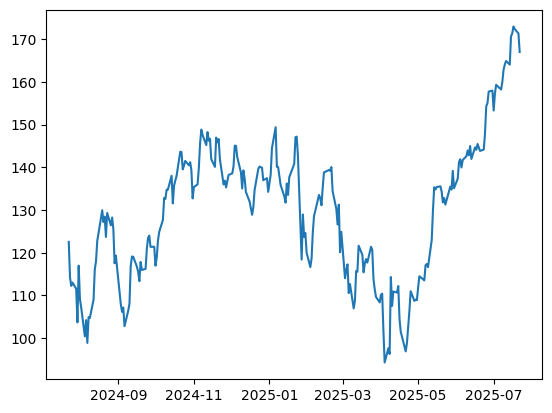

In [ ]:
plt.plot(data.index,data['Close'])

**PLOTTING CLOSING VALUES WITH TIME PERIOD SELECTORS**

In [ ]:
import plotly.express as px

figure = px.line(data['Close'], title='Stock Market Analysis with Time Period Selectors'
)

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.update_layout(
    xaxis_title='Date',
    yaxis_title='Close'
)
figure.show()

**PLOTTING ALL THE VALUES (OPEN, HIGH, LOW, CLOSE) WITH 'BACKWARD' STEPMODE**

*   
BACKWARD IS USED TO CALCULATE EIXED DURATION I.E. 22 JUNE- 22 JULY




In [ ]:
import pandas as pd
import plotly.express as px

# Example: Select multiple columns to plot
df_plot = data[['Open', 'Close','Low','High']].copy()


# Reset index to convert DateTimeIndex into a column (if needed)
df_plot.reset_index(inplace=True)

# Melt the data into long format
df_long = pd.melt(df_plot, id_vars='Date', value_vars=['Open', 'Close','Low','High'],
                  var_name='Metric', value_name='Price')

# Create multi-line plot
fig = px.line(
    df_long,
    x='Date',
    y='Price',
    color='Metric',  # Different color for each metric
    title='Stock Market: Open, Close, Low, High'
)

# Add time range selectors
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    rangeslider_visible=True
)

# Add axis labels
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price'
)

fig.show()


**PLOTTING HIGH LOW VALUES USING 'TODATE' STEPMODE**
*   IT STARTS FROM THE START OF THE TIME UNIT  1JULY - 22 JULY



In [ ]:
hl_plot=data[['High','Low']].copy()
hl_plot.reset_index(inplace=True)
hl_long=pd.melt(hl_plot,id_vars='Date',value_vars=['High','Low'],var_name='Metric',value_name='Price')
fig=px.line(
    hl_long,
    x='Date',
    y='Price',
    color="Metric",
    title='Stock Market:High and Low'
)
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m",step='month',stepmode='todate'),
            dict(count=3, label="3m",step='month',stepmode='todate'),
            dict(count=6, label="6m",step='month',stepmode='todate'),
            dict(count=1, label="1y",step='year',stepmode='todate'),
            dict(step="all")
        ])
    ),
    rangeslider_visible=True
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price'
)

**CANDLE STICK CHART**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Candlestick(
        x=data.index,  # datetime index
        open=data[('Open')],
        high=data[('High')],
        low=data[('Low')],
        close=data[('Close')],
        increasing_line_color='green',
        decreasing_line_color='red'
    )
])

fig.update_layout(
    title='NVDA(NVIDIA) Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    width=1200,      # Increase width
    height=800,      # Increase height
)
fig.show()

In [ ]:
figure = px.bar(data, x = data.index, y= "Close")
figure.show()